In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error, r2_score

from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

### 1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).


In [3]:
from sklearn import datasets
data = datasets.fetch_california_housing(as_frame=True).frame
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### 2. Проверьте данные на наличие пропусков. Удалите их в случае обнаружения.



In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [5]:
# Пропусков нет

### 3. Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.



In [6]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [100]:
def learn_and_metrics(X,y, random_seed=42, model=None):
    if model is None:
        model = LinearRegression()
        
    # Обучили модель
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed) 

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    model.fit(X_train, y_train)
    
    # Предсказания на тренировочной и тестовой выборках.
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    # RMSE для теста и тренировочной
    rmse_train = np.sqrt(mean_squared_error(y_train, pred_train))
    rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))
    
    # R2 для теста и тренировочной
    r2_train = r2_score(y_train, pred_train)
    r2_test = r2_score(y_test, pred_test)
    
    return rmse_train, rmse_test, r2_train, r2_test   

### 4. Постройте модель линейной регрессии. Вычислите метрики RMSE, R2 на обучающем и тестовом множестве.

In [105]:
X1 = data[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]
y1 = data['MedHouseVal']
learn_and_metrics(X1, y1)

(0.7196757085831575, 0.7455813830127762, 0.6125511913966952, 0.575787706032451)

In [104]:
print(f'RMSE для тренировочной: {learn_and_metrics(X1, y1)[0]:.5f} --- RMSE для тестовой: {learn_and_metrics(X1, y1)[1]:.5f}\n\
R2 для тренировочной: {learn_and_metrics(X1, y1)[2]:.5f} --- R2 для тестовой: {learn_and_metrics(X1, y1)[3]:.5f}')

RMSE для тренировочной: 0.71968 --- RMSE для тестовой: 0.74558
R2 для тренировочной: 0.61255 --- R2 для тестовой: 0.57579


### 5. Постройте график распределения целевой переменной. Сделайте вывод. Присутствуют ли в этом признаке выбросы?


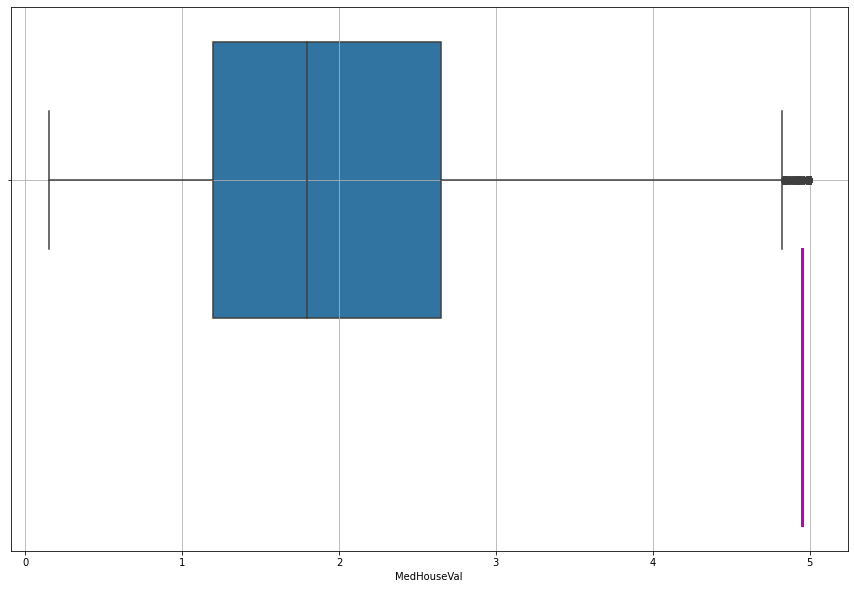

In [48]:
# Добавил условную линию, чтобы было ясно, после какого порога идут выбросы. они есть примерно выше значения 4.95.
# Но я бы не сказал, что их стоит убирать. Посмотрел при оичтске, без них хуже.
sns.boxplot(x = data['MedHouseVal'])
plt.plot([4.95, 4.95], [0.2, 1], c='m', linewidth= 3)
plt.grid()
plt.show()

### 6. Посчитайте и выведите корреляционную матрицу. Убедитесь, что ячейки матрицы поделены на цветные категории, в ячейках указано числовое значение корреляции.



In [11]:
matrix = data.corr()
matrix.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650


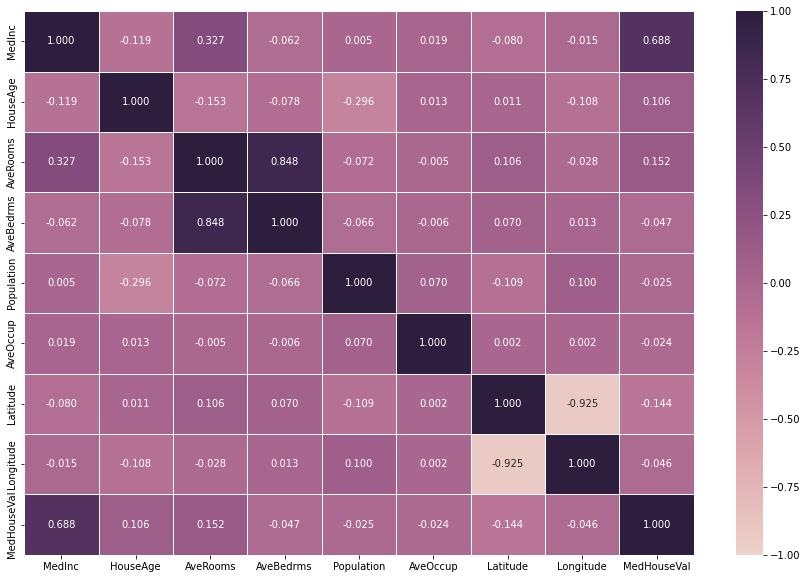

In [28]:
sns.heatmap(matrix, annot=True, vmin = -1, vmax = 1, center=0, fmt=".3f", linewidth=.5, \
            cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

a. Сделайте выводы.

In [13]:
# наивысшая связь это пары: MedInc\MedHouseval; Срднее кол-во комнат/среднее кол-во спален

# А обратную взаимосвязь между шириной и долготой. Не очень понял, но поищу, это интересно)

b. Удалите признаки на основании полученных значений, выводов.


In [14]:
# Так как реально высокая корреляция между Срднее кол-во комнат/среднее кол-во спаленЮ равная 0.848, то удалим один признак.
# Я выбрал спальни, а не комнаты, для удаления)


c. Повторите п. 3, п. 4 на измененных данных.


In [106]:
X2 = data[['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]
y2 = data['MedHouseVal']

learn_and_metrics(X2, y2)

(0.7316746485880744,
 0.7398151789804085,
 0.5995238502055928,
 0.5823239094526443)

In [107]:
print(f'RMSE для тренировочной: {learn_and_metrics(X2, y2)[0]:.5f} --- RMSE для тестовой: {learn_and_metrics(X2, y2)[1]:.5f}\n\
R2 для тренировочной: {learn_and_metrics(X2, y2)[2]:.5f} --- R2 для тестовой: {learn_and_metrics(X2, y2)[3]:.5f}')

RMSE для тренировочной: 0.73167 --- RMSE для тестовой: 0.73982
R2 для тренировочной: 0.59952 --- R2 для тестовой: 0.58232


### 7. Исследуйте оставленные признаки на выбросы.
a. Удалите выбросы в случае обнаружения.


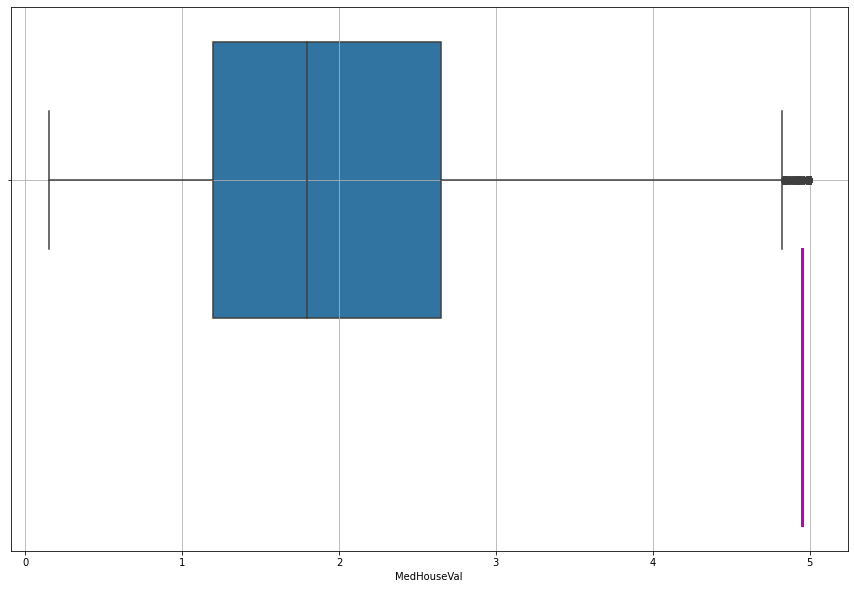

In [41]:
# Выбросы после 4.9
sns.boxplot(x = data['MedHouseVal'])
plt.plot([4.95, 4.95], [0.2, 1], c='m', linewidth= 3)
plt.grid()
plt.show()

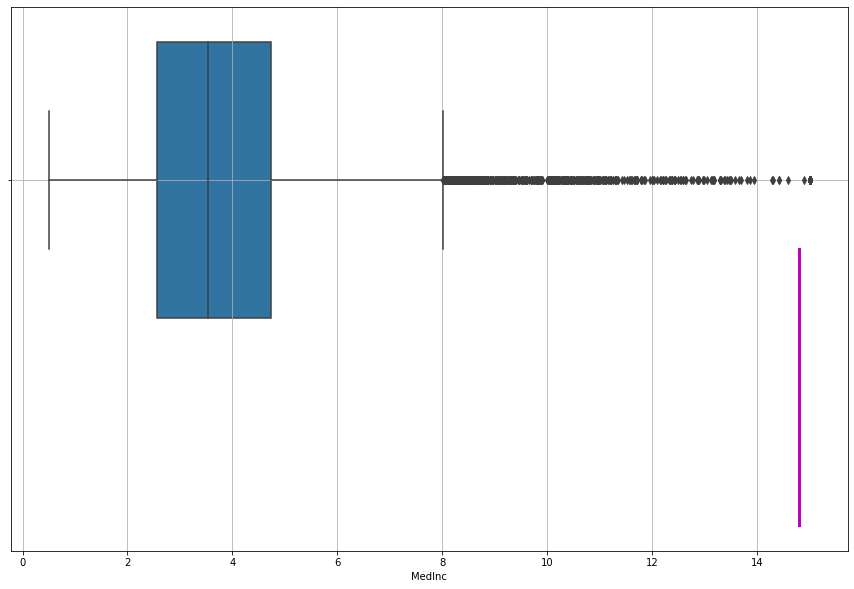

In [51]:
# Выбросы после 14.8
sns.boxplot(x = data['MedInc'])
plt.plot([14.8, 14.8], [0.2, 1], c='m', linewidth= 3)
plt.grid()
plt.show()

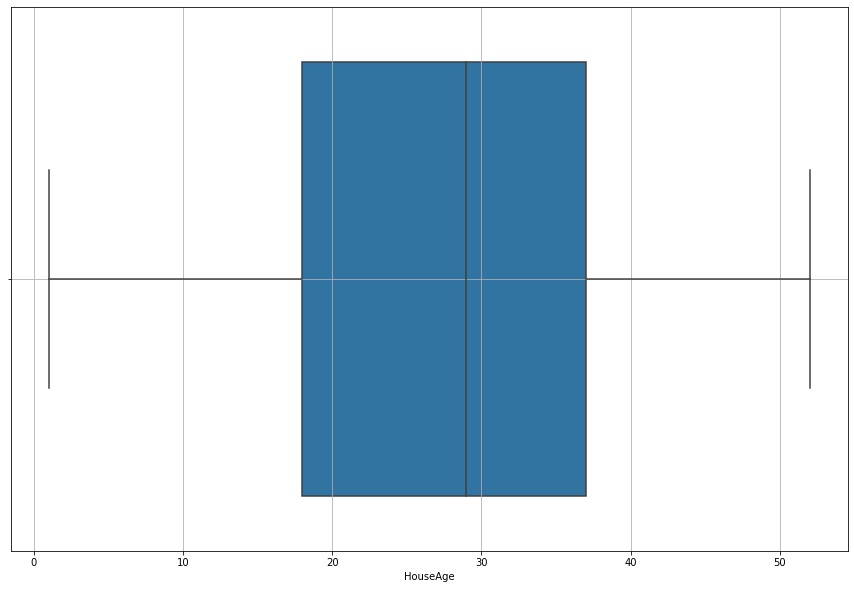

In [31]:
# Выбросы отсутствуют
sns.boxplot(x = data['HouseAge'])
plt.grid()
plt.show()

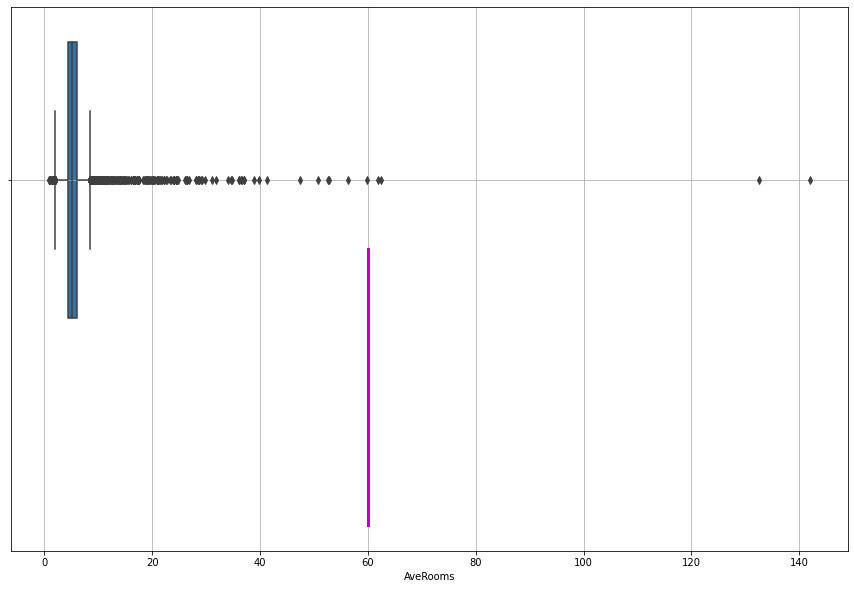

In [52]:
# Выбросы после 60
sns.boxplot(x = data['AveRooms'])
plt.plot([60, 60], [0.2, 1], c='m', linewidth= 3)
plt.grid()
plt.show()

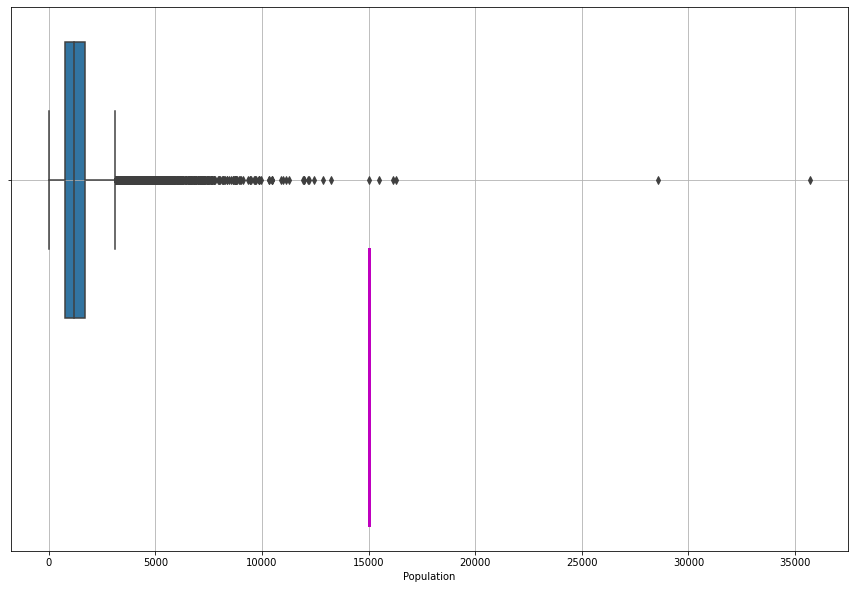

In [33]:
# Выбросы после 15000
sns.boxplot(x = data['Population'])
plt.plot([15000, 15000], [0.2, 1], c='m', linewidth= 3)
plt.grid()
plt.show()

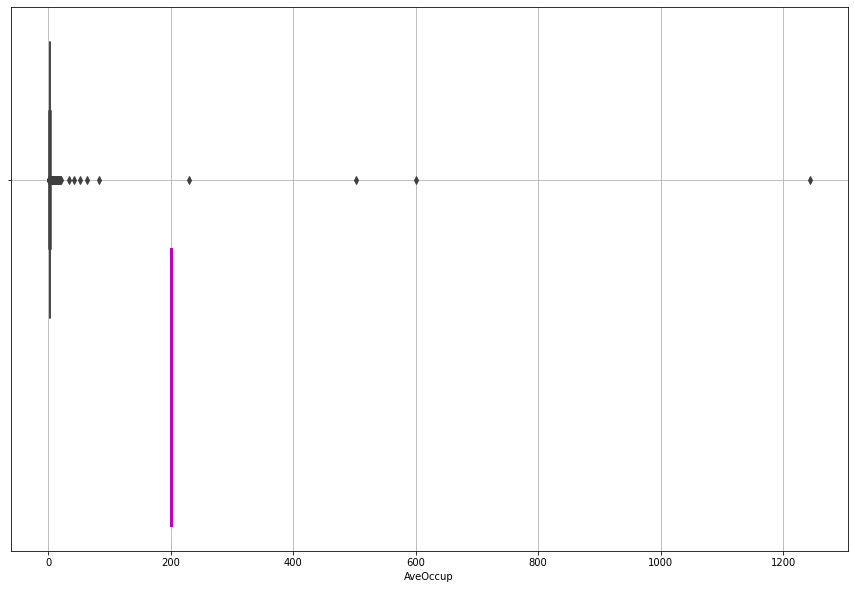

In [59]:
# Выбросы после 200
sns.boxplot(x = data['AveOccup'])
plt.plot([200, 200], [0.2, 1], c='m', linewidth= 3)
plt.grid()
plt.show()

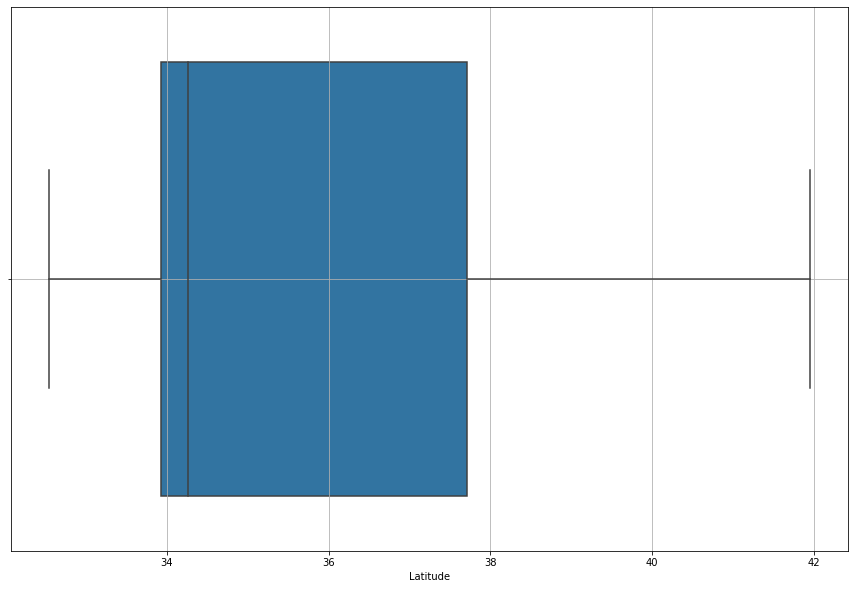

In [35]:
# Выбросы отсутствуют
sns.boxplot(x = data['Latitude'])
plt.grid()
plt.show()

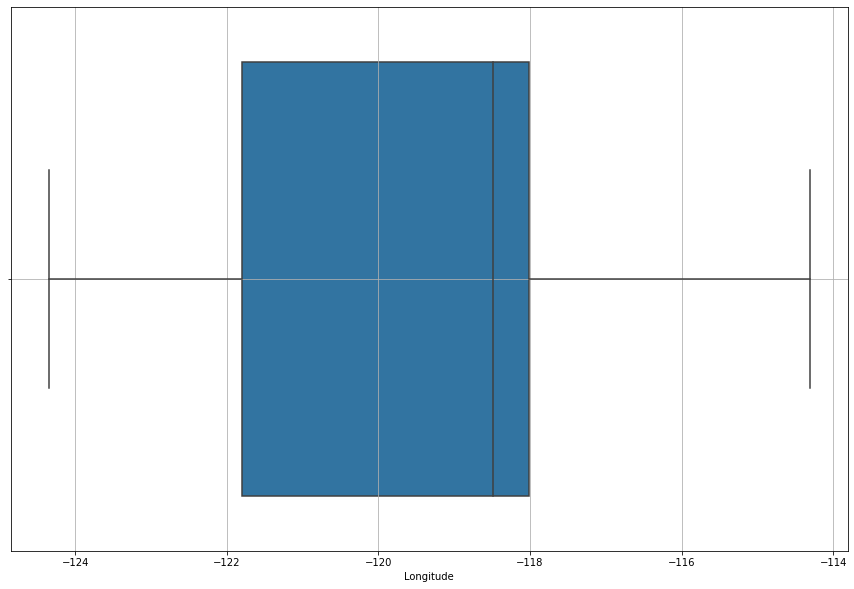

In [36]:
# Выбросы отсутствуют
sns.boxplot(x = data['Longitude'])
plt.grid()
plt.show()

b. Повторите п. 3, п. 4 на измененных данных.


In [56]:
new_data = data.copy(deep=True)

new_data = new_data[new_data['MedInc'] < 14.8]
new_data = new_data[new_data['AveRooms'] < 60]
new_data = new_data[new_data['Population'] < 15000]
new_data = new_data[new_data['AveOccup'] < 200]

In [108]:
X3 = new_data[['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]
y3 = new_data['MedHouseVal']

learn_and_metrics(X3, y3)

(0.7059832538358143,
 0.7248103237342421,
 0.6190807480855216,
 0.6064253513531717)

In [109]:
print(f'RMSE для тренировочной: {learn_and_metrics(X3, y3)[0]:.5f} --- RMSE для тестовой: {learn_and_metrics(X3, y3)[1]:.5f}\n\
R2 для тренировочной: {learn_and_metrics(X3, y3)[2]:.5f} --- R2 для тестовой: {learn_and_metrics(X3, y3)[3]:.5f}')

RMSE для тренировочной: 0.70598 --- RMSE для тестовой: 0.72481
R2 для тренировочной: 0.61908 --- R2 для тестовой: 0.60643


### 8. Измените несколько признаков на выбор математически. Например, вычислите логарифм, возведите в квадрат, извлеките квадратный корень.



In [95]:
last_data = data.copy(deep=True)
last_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [96]:
last_data['AveBedrms'] = np.sqrt(last_data['AveBedrms'])
last_data['HouseAge'] = np.log(last_data['HouseAge'])
last_data['AveOccup'] = np.power(last_data['AveOccup'], 2)

a. Повторите п. 3, п. 4 на измененных данных.

In [110]:
X4 = last_data[['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]
y4 = last_data['MedHouseVal']

learn_and_metrics(X4, y4)

(0.7346466572502509, 0.742809900726755, 0.5962638332603347, 0.5789356164528221)

In [111]:
print(f'RMSE для тренировочной: {learn_and_metrics(X4, y4)[0]:.5f} --- RMSE для тестовой: {learn_and_metrics(X4, y4)[1]:.5f}\n\
R2 для тренировочной: {learn_and_metrics(X4, y4)[2]:.5f} --- R2 для тестовой: {learn_and_metrics(X4, y4)[3]:.5f}')

RMSE для тренировочной: 0.73465 --- RMSE для тестовой: 0.74281
R2 для тренировочной: 0.59626 --- R2 для тестовой: 0.57894


### 9. Сформулируйте выводы по проделанной работе.
a. Кратко опишите какие преобразования были сделаны с данными.


Предобработка, загрузили данные, разделили их наа выборку 80/20 с выбранными признаками. Сделали функцию для обучения и подсчета интересующих нас метрик. Посмотрели выбросы, убрали их. Посмотрели корреляции и убрали их. Поигрались с преобразованиями и посмотрели метрики.

b. Сравните метрики всех моделей. Желательно оформление в виде таблицы вида |модель|RMSE|R2|признаки, на которых проводилось обучение с указанием их преобразований|.


In [115]:
d = {'Модель': ['Сырые данные', 'Убрал корреллирующие признаки', 'Без выбросов', 'После мат. преобразований'],
    'RMSE_train': [learn_and_metrics(X1, y1)[0], learn_and_metrics(X2, y2)[0], \
             learn_and_metrics(X3, y3)[0], learn_and_metrics(X4, y4)[0]],
    'RMSE_test': [learn_and_metrics(X1, y1)[1], learn_and_metrics(X2, y2)[1], \
             learn_and_metrics(X3, y3)[1], learn_and_metrics(X4, y4)[1]],
    'R2_train': [learn_and_metrics(X1, y1)[2], learn_and_metrics(X2, y2)[2], \
             learn_and_metrics(X3, y3)[2], learn_and_metrics(X4, y4)[2]],
    'R2_test': [learn_and_metrics(X1, y1)[3], learn_and_metrics(X2, y2)[3], \
             learn_and_metrics(X3, y3)[3], learn_and_metrics(X4, y4)[3]],
    'Признаки': [['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], \
                 ['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], \
                 ['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], \
                 ['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]}

dddd = pd.DataFrame(data = d)
dddd

,Модель,RMSE_train,RMSE_test,R2_train,R2_test,Признаки
0,Сырые данные,0.719676,0.745581,0.612551,0.575788,"[MedInc, HouseAge, AveRooms, AveBedrms, Popula..."
1,Убрал корреллирующие признаки,0.731675,0.739815,0.599524,0.582324,"[MedInc, HouseAge, AveRooms, Population, AveOc..."
2,Без выбросов,0.705983,0.724810,0.619081,0.606425,"[MedInc, HouseAge, AveRooms, Population, AveOc..."
3,После мат. преобразований,0.734647,0.742810,0.596264,0.578936,"[MedInc, HouseAge, AveRooms, Population, AveOc..."


c. Напишите свое мнение, в полной ли мере модели справились с поставленной задачей.


Где-то да, а где-то нет. Все дело в выборе методов. По нашим параметрам мы видм, чьто разные преобразования улучшают или ухудшают качество модели. Поэтому нужно осторожно подходить к выбору инструментов и эксперементировать в процессе.